In [1]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd

from nnAudio import Spectrogram

import sys
sys.path.insert(0,'../')

import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
y_list = np.load('./y_list.npy')

In [3]:
y_torch = torch.tensor(y_list, dtype=torch.float)

In [4]:
y_torch.shape

torch.Size([1770, 80000])

In [5]:
timing = []

for e in range(20):
    t_start = time.time()
    spec = torch.stft(y_torch, n_fft=2048, hop_length=512, window=torch.hann_window(2048))
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

0.010691404342651367
0.0027997493743896484
0.00032401084899902344
0.0003123283386230469
0.0003063678741455078
0.00030684471130371094
0.0003058910369873047
0.00030541419982910156
0.00030422210693359375
0.00030303001403808594
0.0003027915954589844
0.0003116130828857422
0.00030159950256347656
0.0003027915954589844
0.00030517578125
0.00030517578125
0.0003037452697753906
0.0003039836883544922
0.0003027915954589844
0.0003027915954589844


In [6]:
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

mean =  0.0009500861167907714
std =  0.0022997711947546386


In [7]:
data = pd.DataFrame(timing,columns=['t_avg'])
data['Type'] = 'torch.stft_GPU'

In [8]:
data.to_csv('Spec_torch.stft_GPU')

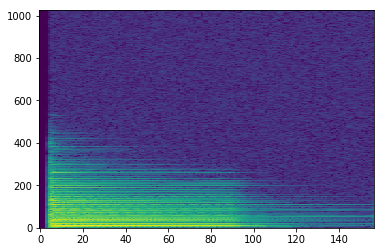

In [9]:
plt.imshow(torch.log(torch.norm(spec[0], dim=-1)+1).cpu().numpy(), aspect='auto', origin='lower')